<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo3_RedesNeuronales/CNN_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025

**Clasificación de Imágenes con Redes Neuronales Convolucionales**

Las redes neuronales convolucionales son conocidas habitualmente por sus siglas en inglés, CNNs (Convolutional Neural Networks).


### Librerías

Verificación versión de TensorFlow

In [ ]:
import matplotlib.pyplot as plt
import random
import seaborn as sns
import os
from PIL import Image
import tensorflow as tf
import numpy as np
import kagglehub
from sklearn.metrics import classification_report  #Cálculo de las métricas
print(tf.__version__)

2.18.0


Los imágenes a clasificar son tomadas de:

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [ ]:
# Clonar repositorio
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython/
os.chdir("/content/ERAP_CursoPython/Modulo2_Fundamentos_AI")



Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 922, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 922 (delta 185), reused 99 (delta 93), pack-reused 704 (from 2)
Receiving objects: 100% (922/922), 54.06 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (454/454), done.


In [ ]:
# Descarga el dataset "rockpaperscissors" del usuario "drgfreeman" usando Kaggle Hub
# Retorna la ruta donde se guardó el dataset descargado
path = kagglehub.dataset_download("drgfreeman/rockpaperscissors")

# Lista todos los archivos y directorios contenidos en la ruta de descarga
# os.listdir() devuelve una lista con los nombres de las entradas en el directorio
contenido = os.listdir(path)

# Notas importantes:
# 1. kagglehub.dataset_download() descarga el dataset en un formato específico de Kaggle
# 2. El dataset puede venir en diferentes estructuras:
#    - Como directorio con subdirectorios (rock/, paper/, scissors/)
#    - Como archivo comprimido (dataset.zip)
# 3. Si os.listdir() falla, puede ser porque:
#    - La descarga no se completó correctamente
#    - El path retornado no es un directorio directamente accesible
#    - Se necesitan permisos adicionales



In [ ]:
# Imprime el número de archivos en el directorio 'rock'
print(len(os.listdir(path + "/" + "rock")))  # Muestra cuántas imágenes de 'rock' hay disponibles

# Imprime el número de archivos en el directorio 'paper'
print(len(os.listdir(path + "/" + "paper")))  # Muestra cuántas imágenes de 'paper' hay disponibles

# Lista TODOS los archivos en el directorio 'scissors' (puede ser mucha salida)
print(os.listdir(path + "/" + "scissors"))  # Muestra los nombres de todos los archivos de 'scissors'

726
712
['TfQG2fJYyDv8Ic8P.png', 'EesxTpYzhZoMVlH8.png', '8Gew5erdZ7A4K3gI.png', 'RydyYWgvhLQPwEaw.png', '256MrhkDete6aQhP.png', 'o1cPo5Z2YLfTz2vJ.png', 'jWUoY57nkFKUUdD5.png', 'cDveaur4dR2ZCCo8.png', 'JSDICtLrQIEXhPy5.png', 'eqJEQe8W9FP4TOck.png', 'j1EfA5DclfCJdzLb.png', 'FoYWUBXBw6qO7y0f.png', 'cPuxKnJCdcTotM5k.png', '7vtC68OSHd1FZJvN.png', 'OA0s5AsfJEm96cxd.png', 'aMAVOdimraDSK6P1.png', 'gzRmdTIFRzV34Vjl.png', 'jMVjrTQfvJ0xLTOt.png', 'zdo3LHesq3aHmu1f.png', 'lhD4U5er2UL6nfAH.png', '8Q1PAZsxpLf5FAo6.png', 'kC1AoCFrvaMKlTDk.png', 'NR48QMe5e1gskpA9.png', '2C9FEbBklwcVhF3W.png', 'mmLhBFvXWgD957XY.png', 'QGySPOxev60wlq1M.png', 'vMAludIRGF14FuGn.png', 'WUEe440w137BuSEE.png', 'pZ9zE5ahoKZhIZqm.png', '3n4i3lKB3nZOpDVv.png', 'bn7yju6XvU87slzH.png', '2ZPcSpOm7SEfQYwg.png', 'KSNET1XTWbrg5Rcz.png', 'oYB271o4Oo5uFHpW.png', '55yz6JI9f5DTbq9D.png', '5DdrFpDc8YbG1oCo.png', '64ktckSF0c26K6AY.png', 'oxyMOfWC1lQU6dRf.png', '5mipmm4t8RM5o0tW.png', 'wT8z7icdMJt816Ix.png', 'UPH9bl4Vrq4Gwp3K.png', 'FCsZ8x

### Cargar Imágenes del repositorio:

Se considera que las imágenes están organizadas por categoría, almacenadas en directorios separados llamados *rock*, *paper* y *scissors*. Dentro de cada uno, los archivos de imagen están nombrados secuencialmente desde 0.png hasta 699.png, representando su número correspondiente.


In [ ]:
# Descripción de clases y su identificador
descripcion = ("paper", "rock", "scissors")
clases = {"paper": 0, "rock": 1, "scissors": 2}

# Número de imágenes de cada clase a considerar (máximo 700)
num_img_clase = 700

# Porcentajes de división
train_ratio = 0.7
test_ratio = 0.3

# Calcular número de imágenes para entrenamiento y prueba
num_entrena = round(num_img_clase * train_ratio)
num_prueba = round(num_img_clase * test_ratio)

# Inicializar arrays para almacenar los datos
imagenes_entrena = np.empty((num_entrena * len(clases), 200, 300, 3), dtype="uint8")
clases_entrena = np.empty(num_entrena * len(clases), dtype="uint8")

imagenes_prueba = np.empty((num_prueba * len(clases), 200, 300, 3), dtype="uint8")
clases_prueba = np.empty(num_prueba * len(clases), dtype="uint8")

# Para cada clase, seleccionar 700 imágenes aleatorias y dividirlas en train/test
for clase in clases:
    # Obtener lista de todos los archivos en el directorio de la clase
    archivos = os.listdir(path + "/" + clase)

    # Seleccionar aleatoriamente 700 imágenes (sin repetición)
    archivos_seleccionados = random.sample(archivos, num_img_clase)

    # Dividir en conjuntos de entrenamiento y prueba
    archivos_train = archivos_seleccionados[:num_entrena]
    archivos_test = archivos_seleccionados[num_entrena:num_img_clase]

    # Cargar imágenes de entrenamiento
    for i, archivo in enumerate(archivos_train):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_entrena
        imagenes_entrena[indice] = np.array(imagen)
        clases_entrena[indice] = clases[clase]

    # Cargar imágenes de prueba
    for i, archivo in enumerate(archivos_test):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_prueba
        imagenes_prueba[indice] = np.array(imagen)
        clases_prueba[indice] = clases[clase]

# Verificación
print(f"Total imágenes entrenamiento: {len(imagenes_entrena)}")
print(f"Total imágenes prueba: {len(imagenes_prueba)}")
print("¡Datos cargados exitosamente!")

Total imágenes entrenamiento: 1470
Total imágenes prueba: 630
¡Datos cargados exitosamente!


# Visualización de imágenes aleatorias

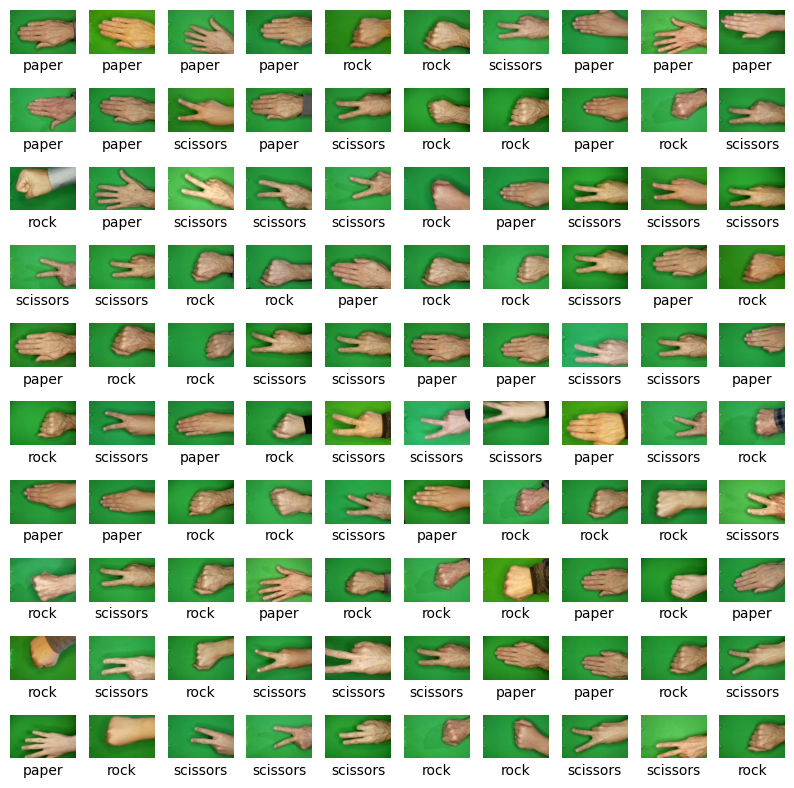

In [ ]:
# Crear una figura de matplotlib con tamaño 10x10 pulgadas
plt.figure(figsize=(10, 10))

# Mostrar 100 imágenes en una cuadrícula de 10x10
for i in range(100):
    # Crear subplot en posición i+1 (comienza en 1, no en 0)
    plt.subplot(10, 10, i + 1)

    # Seleccionar un índice aleatorio dentro del rango de imágenes de entrenamiento
    indice = random.randint(0, num_entrena*len(clases) - 1)

    # Mostrar la imagen correspondiente al índice seleccionado
    # Se usa cmap="gray" para mostrar en escala de grises (aunque las imágenes son RGB)
    plt.imshow(imagenes_entrena[indice], cmap="gray")

    # Añadir etiqueta (clase) como texto en la parte inferior
    plt.xlabel(descripcion[clases_entrena[indice]])

    # Configuraciones de estilo para mejorar la visualización:
    plt.grid(False)    # Desactivar cuadrícula
    plt.box(False)     # Desactivar borde alrededor de la imagen
    plt.xticks([])     # Eliminar marcas del eje X
    plt.yticks([])     # Eliminar marcas del eje Y

# Mostrar la figura completa con todas las sub-imágenes
plt.show()

## Visualización de una sola imagen en tamaño grande

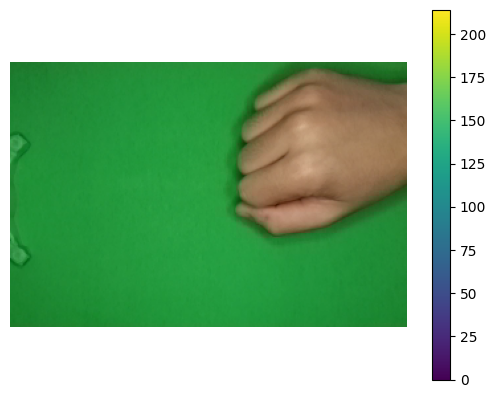

In [ ]:
num_aleatorio = random.randint(0, 700)
# Crear una nueva figura de matplotlib (tamaño por defecto)
plt.figure()

# Mostrar la imagen de prueba número aleatorio del conjunto de datos
plt.imshow(imagenes_prueba[num_aleatorio])  # Muestra la imagen con mapeo de colores automático

# Añadir una barra de color (colorbar) que indica la escala de valores de píxeles
plt.colorbar()  # Útil para entender el rango de valores de intensidad en la imagen

# Configuraciones de estilo para una visualización más limpia:
plt.grid(False)    # Desactivar la cuadrícula (repetido por seguridad)
plt.box(False)     # Desactivar el borde alrededor de la imagen
plt.grid(False)    # Desactivar la cuadrícula nuevamente (redundante pero inofensivo)
plt.xticks([])     # Eliminar las marcas y etiquetas del eje X
plt.yticks([])     # Eliminar las marcas y etiquetas del eje Y

# Mostrar la figura con la imagen y la barra de color
plt.show()

In [ ]:
### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

# Modelo CNN para Clasificación de Imágenes

In [ ]:
# Definición del modelo secuencial (capas apiladas linealmente)
modelo = tf.keras.Sequential([
    # Primera capa convolucional:
    # - 32 filtros de 3x3 píxeles
    # - Función de activación ReLU (Rectified Linear Unit)
    # - Input shape: 200 (alto) x 300 (ancho) x 3 canales (RGB)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)),

    # Capa de Max Pooling:
    # - Reducción dimensional con ventana de 2x2
    # - Reduce el tamaño espacial a la mitad (selecciona el valor máximo en cada ventana)
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Segunda capa convolucional:
    # - 64 filtros de 3x3 píxeles
    # - Función de activación ReLU
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    # Segunda capa de Max Pooling:
    # - Nueva reducción dimensional 2x2
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Capa Flatten:
    # - "Aplana" los mapas de características 2D a un vector 1D
    # - Prepara los datos para las capas densas (fully connected)
    tf.keras.layers.Flatten(),

    # Capa Densa (fully connected):
    # - 64 neuronas con activación ReLU
    # - Capa intermedia para aprendizaje de características complejas
    tf.keras.layers.Dense(64, activation="relu"),

    # Capa de Salida:
    # - 3 neuronas (una por cada clase: paper, rock, scissors)
    # - Sin función de activación (logits)
    tf.keras.layers.Dense(3),

    # Capa Softmax:
    # - Convierte los logits en probabilidades (suma = 1)
    # - Cada neurona representa la probabilidad de pertenecer a cada clase
    tf.keras.layers.Softmax()
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Cofigurarción del Modelo para Entrenamiento

In [ ]:
modelo.compile(
    # Optimizador: Descenso de Gradiente Estocástico (SGD)
    # - Algoritmo de optimización básico que actualiza los pesos en dirección opuesta al gradiente
    # - Versión por defecto sin ajuste de learning rate (puede no ser óptimo)
    optimizer="sgd",  # Equivalente a tf.keras.optimizers.SGD()

    # Función de pérdida: Sparse Categorical Crossentropy
    # - Adecuada para clasificación multi-clase con etiquetas enteras (0, 1, 2)
    # - Calcula la diferencia entre probabilidades predichas y etiquetas reales
    # - "Sparse" significa que acepta etiquetas enteras directamente (no requiere one-hot encoding)
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),

    # Métrica a monitorear: Precisión (Accuracy)
    # - Porcentaje de predicciones correctas sobre el total
    # - Útil para problemas balanceados como rock-paper-scissors
    metrics=["accuracy"]
)

# Entrenamiento de la CNN

In [ ]:
# Entrena la red neuronal con las imágenes y clases del conjunto de entrenamiento.
# El proceso se repite durante 10 épocas, es decir, el modelo verá todo el conjunto de datos 10 veces.
modelo.fit(imagenes_entrena, clases_entrena, epochs=10)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.4006 - loss: 1.1300
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5550 - loss: 0.9540
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7187 - loss: 0.7207
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7780 - loss: 0.5634
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7825 - loss: 0.5108
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8381 - loss: 0.3985
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8977 - loss: 0.2760
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9214 - loss: 0.2417
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9082 - loss: 0.2656
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9410 - loss: 0.1750


# Evaluación del modelo

In [ ]:
# Evalúa el rendimiento del modelo sobre el conjunto de prueba (imágenes y etiquetas reales)
# Retorna la pérdida (loss) y la exactitud (accuracy)
perdida, exactitud = modelo.evaluate(imagenes_prueba, clases_prueba)

# Imprime la pérdida obtenida en el conjunto de prueba
print(f"Pérdida (Loss) en el conjunto de prueba: {perdida:.4f}")

# Imprime la exactitud obtenida, que representa el porcentaje de imágenes clasificadas correctamente
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba:", exactitud)

# Imprime la exactitud como porcentaje con dos decimales
print(f"Exactitud (Accuracy) en el conjunto de prueba: {exactitud * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9036 - loss: 0.2351
Pérdida (Loss) en el conjunto de prueba: 0.1822
Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba: 0.9269841313362122
Exactitud (Accuracy) en el conjunto de prueba: 92.70%


# Clasificación de las imágenes del conjunto de entrenamiento con la CNN entrenada

In [ ]:
# Genera predicciones del modelo para las imágenes del conjunto de pruentrenamiento
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen
predicciones_train = modelo.predict(imagenes_entrena)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


In [ ]:
# Crea un arreglo vacío para almacenar la clase predicha de cada imagen del conjunto de entrenamiento
# El tamaño del arreglo es igual al número total de imágenes de entrenamiento (num_entrena * número de clases)
clase_predicha_train = np.empty(num_entrena * len(clases), dtype="uint8")

# Recorre cada instancia (imagen) del conjunto de prueba
for instancia in range(num_entrena * len(clases)):
    # Obtiene la clase predicha: índice de la mayor probabilidad en las predicciones de esa imagen
    clase_predicha_train[instancia] = np.argmax(predicciones_train[instancia])

    # Compara la clase predicha con la clase verdadera
    if clase_predicha_train[instancia] == clases_entrena[instancia]:
        print("Probabilidades:", predicciones_train[instancia],
              "Clase predicha:", clase_predicha_train[instancia],
              "Clase correcta:", clases_entrena[instancia],
              "La Red Neuronal ACERTÓ")
    else:
        print("Probabilidades:", predicciones_train[instancia],
              "Clase predicha:", clase_predicha_train[instancia],
              "Clase correcta:", clases_entrena[instancia],
              "La Red Neuronal ERRÓ")


Probabilidades: [0.995099   0.00347534 0.00142558] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.9889036  0.00897166 0.0021248 ] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9681276e-01 2.5095898e-03 6.7772006e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9929154e-01 4.5591331e-04 2.5255024e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.59262115 0.02180384 0.385575  ] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.48876378 0.14250976 0.3687264 ] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.99329245 0.00278453 0.00392303] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.5917672  0.03361098 0.37462178] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9808443e-01 1.1394556e-03 7.7612814e-04] Clase predicha: 0 Clase correcta: 0 La Red

Matriz de Confusión conjunto entrenamiento:
 [[445  32  13]
 [  2 486   2]
 [  4   8 478]]


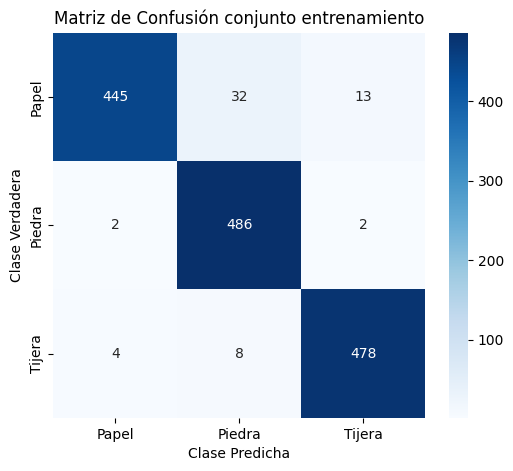


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       490
           1       0.92      0.99      0.96       490
           2       0.97      0.98      0.97       490

    accuracy                           0.96      1470
   macro avg       0.96      0.96      0.96      1470
weighted avg       0.96      0.96      0.96      1470



In [ ]:
# Asignación de etiquetas numéricas para cada clase: papel = 0, piedra = 1, tijera = 2
# Genera la matriz de confusión comparando etiquetas reales del conjunto de entrenamiento (es decir, datos ya vistos) con las predichas
matriz_train = tf.math.confusion_matrix(clases_entrena, clase_predicha_train)

# Imprime la matriz de confusión como array de NumPy
print("Matriz de Confusión conjunto entrenamiento:\n", matriz_train.numpy())

# Define etiquetas de clase
etiquetas = ['Papel', 'Piedra', 'Tijera']

# Convierte la matriz de confusión a un array de NumPy (por si está en formato Tensor)
matriz_np = matriz_train.numpy()

# Configura el tamaño de la figura
plt.figure(figsize=(6, 5))

# Dibuja la matriz de confusión como un mapa de calor
sns.heatmap(matriz_np, annot=True, fmt="d", cmap="Blues",
            xticklabels=etiquetas, yticklabels=etiquetas)

# Títulos y etiquetas
plt.title("Matriz de Confusión conjunto entrenamiento")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")

# Muestra la figura
plt.show()


print("\nReporte de clasificación:")
print(classification_report(clases_entrena, clase_predicha_train))

# Clasificación de las Imágenes del conjunto de prueba con la CNN entrenada

In [ ]:
# Genera predicciones del modelo para las imágenes del conjunto de prueba
# El resultado será un array con las probabilidades asignadas a cada clase para cada imagen
predicciones = modelo.predict(imagenes_prueba)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


# Salida de la CNN para cada imagen del conjunto de prueba

In [ ]:
# Crea un arreglo vacío para almacenar la clase predicha de cada imagen del conjunto de prueba
# El tamaño del arreglo es igual al número total de imágenes de prueba (num_prueba * número de clases)
clase_predicha = np.empty(num_prueba * len(clases), dtype="uint8")

# Recorre cada instancia (imagen) del conjunto de prueba
for instancia in range(num_prueba * len(clases)):
    # Obtiene la clase predicha: índice de la mayor probabilidad en las predicciones de esa imagen
    clase_predicha[instancia] = np.argmax(predicciones[instancia])

    # Compara la clase predicha con la clase verdadera
    if clase_predicha[instancia] == clases_prueba[instancia]:
        print("Probabilidades:", predicciones[instancia],
              "Clase predicha:", clase_predicha[instancia],
              "Clase correcta:", clases_prueba[instancia],
              "La Red Neuronal ACERTÓ")
    else:
        print("Probabilidades:", predicciones[instancia],
              "Clase predicha:", clase_predicha[instancia],
              "Clase correcta:", clases_prueba[instancia],
              "La Red Neuronal ERRÓ")


Probabilidades: [0.98530906 0.00523897 0.00945198] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.50273836 0.12261067 0.37465096] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.6154455  0.06121022 0.3233443 ] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.9934588  0.0052729  0.00126821] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [9.9926251e-01 5.9819041e-04 1.3920499e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.8373289  0.08359378 0.07907736] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.89174265 0.04836761 0.05988976] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.990289   0.00409434 0.0056167 ] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.03131974 0.8408227  0.12785757] Clase predicha: 1 Clase correcta: 0 La Red Neuronal ERRÓ
Pro

# Resultado de la evaluación: matriz de confusión:

Matriz de Confusión:
 [[185  20   5]
 [  3 202   5]
 [  6   7 197]]


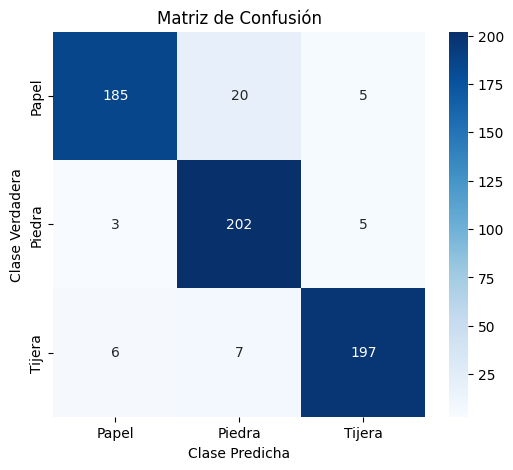


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       210
           1       0.88      0.96      0.92       210
           2       0.95      0.94      0.94       210

    accuracy                           0.93       630
   macro avg       0.93      0.93      0.93       630
weighted avg       0.93      0.93      0.93       630



In [ ]:
# Asignación de etiquetas numéricas para cada clase: papel = 0, piedra = 1, tijera = 2
# Genera la matriz de confusión comparando etiquetas reales con predichas
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha)

# Imprime la matriz de confusión como array de NumPy
print("Matriz de Confusión:\n", matriz.numpy())

# Define etiquetas de clase
etiquetas = ['Papel', 'Piedra', 'Tijera']

# Convierte la matriz de confusión a un array de NumPy (por si está en formato Tensor)
matriz_np = matriz.numpy()

# Configura el tamaño de la figura
plt.figure(figsize=(6, 5))

# Dibuja la matriz de confusión como un mapa de calor
sns.heatmap(matriz_np, annot=True, fmt="d", cmap="Blues",
            xticklabels=etiquetas, yticklabels=etiquetas)

# Títulos y etiquetas
plt.title("Matriz de Confusión")
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")

# Muestra la figura
plt.show()

print("\nReporte de clasificación:")
print(classification_report(clases_prueba, clase_predicha))


# Actividad

Dataset: CIFAR-10
CIFAR-10 es un conjunto de datos clásico que contiene 60,000 imágenes a color de 32x32 píxeles, divididas en 10 clases (aviones, automóviles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones). Cada clase tiene 6,000 imágenes.


Realizar la calsificación de las 10 clases utilizando CNN

In [ ]:
# Cargar el dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalizar los valores de píxeles al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Nombres de las clases
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Visualizar algunas imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()